In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
np.random.seed(1)
X1 = np.random.randint(1, 10, size=10).reshape(-1, 2)
X1

array([[6, 9],
       [6, 1],
       [1, 2],
       [8, 7],
       [3, 5]])

In [93]:
np.random.seed(1)
X2 = np.random.randint(10, 20, size=10).reshape(-1, 2)
X2

array([[15, 18],
       [19, 15],
       [10, 10],
       [11, 17],
       [16, 19]])

In [94]:
X_train = np.concatenate([X1, X2])
X_train

array([[ 6,  9],
       [ 6,  1],
       [ 1,  2],
       [ 8,  7],
       [ 3,  5],
       [15, 18],
       [19, 15],
       [10, 10],
       [11, 17],
       [16, 19]])

In [95]:
y_train = np.array([0,0,0,0,0,1,1,1,1,1])
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [96]:
X_train.shape

(10, 2)

In [97]:
y_train.shape

(10,)

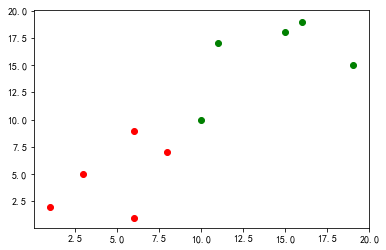

In [98]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='g')
plt.show()

In [99]:
# 测试点
x = np.array([9, 10])

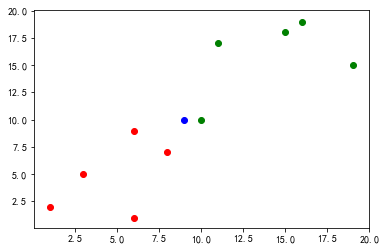

In [100]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='r')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='g')
plt.scatter(x[0], x[1], color='b')
plt.show()

引入明可夫斯基距离函数

In [101]:
def distance(a, b, p=2):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

In [102]:
distances = []

# 计算测试点与每个点之间的欧拉距离
for item in X_train:
    distances.append(distance(x, item))
distances

[3.1622776601683795,
 9.486832980505138,
 11.313708498984761,
 3.1622776601683795,
 7.810249675906654,
 10.0,
 11.180339887498949,
 1.0,
 7.280109889280518,
 11.40175425099138]

In [103]:
X_train

array([[ 6,  9],
       [ 6,  1],
       [ 1,  2],
       [ 8,  7],
       [ 3,  5],
       [15, 18],
       [19, 15],
       [10, 10],
       [11, 17],
       [16, 19]])

In [104]:
# 列表生成式
distances = [distance(item, x) for item in X_train]
distances

[3.1622776601683795,
 9.486832980505138,
 11.313708498984761,
 3.1622776601683795,
 7.810249675906654,
 10.0,
 11.180339887498949,
 1.0,
 7.280109889280518,
 11.40175425099138]

In [105]:
ind = np.argsort(distances)
ind

array([7, 0, 3, 8, 4, 1, 5, 6, 2, 9])

In [106]:
X_train[ind]

array([[10, 10],
       [ 6,  9],
       [ 8,  7],
       [11, 17],
       [ 3,  5],
       [ 6,  1],
       [15, 18],
       [19, 15],
       [ 1,  2],
       [16, 19]])

In [107]:
y_train[ind]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [108]:
k = 3

In [109]:
y_train[ind[:k]]

array([1, 0, 0])

In [110]:
# 投票
from collections import Counter
votes = Counter(y_train[ind[:k]])
votes

Counter({0: 2, 1: 1})

In [111]:
# 获取最高票数的
votes.most_common(1)

[(0, 2)]

In [112]:
predict_y = votes.most_common(1)[0][0]
predict_y

0